In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Load dataset

In [2]:
who_df = pd.read_csv('/kaggle/input/uncover/UNCOVER_v4/UNCOVER/WHO/world-health-organization-who-situation-reports.csv')
who_df.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2020-02-25,Afghanistan,NaN,NaN,1,NaN
1,2020-02-26,Afghanistan,0.0,NaN,1,NaN
2,2020-02-27,Afghanistan,0.0,NaN,1,NaN
3,2020-02-28,Afghanistan,0.0,NaN,1,NaN
4,2020-02-29,Afghanistan,0.0,NaN,1,NaN


### Find NaN or missing values

In [3]:
who_df.isna().sum()
who_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2867 entries, 0 to 2866
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          2867 non-null   object 
 1   location      2867 non-null   object 
 2   new_cases     2707 non-null   float64
 3   new_deaths    540 non-null    float64
 4   total_cases   2867 non-null   int64  
 5   total_deaths  587 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 134.5+ KB


### Fill missing values with default 0

In [4]:
who_df.fillna(0, inplace=True)

In [5]:
who_df.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2020-02-25,Afghanistan,0.0,0.0,1,0.0
1,2020-02-26,Afghanistan,0.0,0.0,1,0.0
2,2020-02-27,Afghanistan,0.0,0.0,1,0.0
3,2020-02-28,Afghanistan,0.0,0.0,1,0.0
4,2020-02-29,Afghanistan,0.0,0.0,1,0.0


In [6]:
who_df.describe()

,new_cases,new_deaths,total_cases,total_deaths
count,2867.000000,2867.000000,2867.000000,2867.000000
mean,124.565051,5.134984,2517.981863,82.907569
std,810.123104,35.807195,13805.255915,489.515917
min,-10.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,2.000000,0.000000
50%,0.000000,0.000000,9.000000,0.000000
75%,6.000000,0.000000,48.000000,0.000000
max,19572.000000,855.000000,179112.000000,7426.000000


In [7]:
who_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2867 entries, 0 to 2866
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          2867 non-null   object 
 1   location      2867 non-null   object 
 2   new_cases     2867 non-null   float64
 3   new_deaths    2867 non-null   float64
 4   total_cases   2867 non-null   int64  
 5   total_deaths  2867 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 134.5+ KB


### Convert non-integer data types to integer

In [8]:
who_df[['new_cases','new_deaths','total_deaths']]=who_df[['new_cases','new_deaths','total_deaths']].astype(int)

In [9]:
who_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2867 entries, 0 to 2866
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          2867 non-null   object
 1   location      2867 non-null   object
 2   new_cases     2867 non-null   int64 
 3   new_deaths    2867 non-null   int64 
 4   total_cases   2867 non-null   int64 
 5   total_deaths  2867 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 134.5+ KB


### Find correlation between data columns

In [10]:
corr = who_df.corr()
corr

,new_cases,new_deaths,total_cases,total_deaths
new_cases,1.000000,0.712025,0.624136,0.601399
new_deaths,0.712025,1.000000,0.693950,0.731909
total_cases,0.624136,0.693950,1.000000,0.986913
total_deaths,0.601399,0.731909,0.986913,1.000000


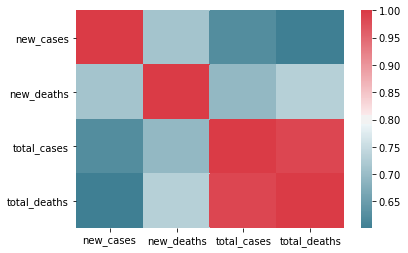

In [11]:
sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.show()

### Visualize data columns to see the correlation

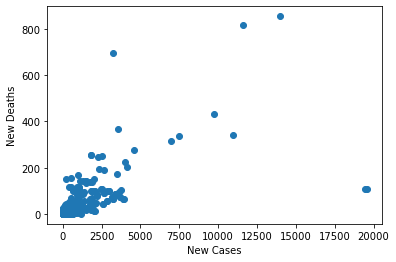

In [12]:
plt.scatter(who_df['new_cases'],who_df['new_deaths'])
plt.xlabel('New Cases')
plt.ylabel('New Deaths')
plt.show()

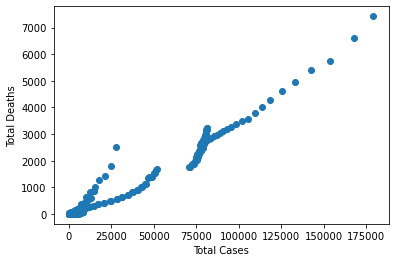

In [13]:
plt.scatter(who_df['total_cases'],who_df['total_deaths'])
plt.xlabel('Total Cases')
plt.ylabel('Total Deaths')
plt.show()

### Get country wise totals

In [14]:
country_grouped_df = who_df.groupby(['location']).sum().reset_index()
country_grouped_df = country_grouped_df[(country_grouped_df['location'] != 'World') & (country_grouped_df['total_deaths'] > 500)]

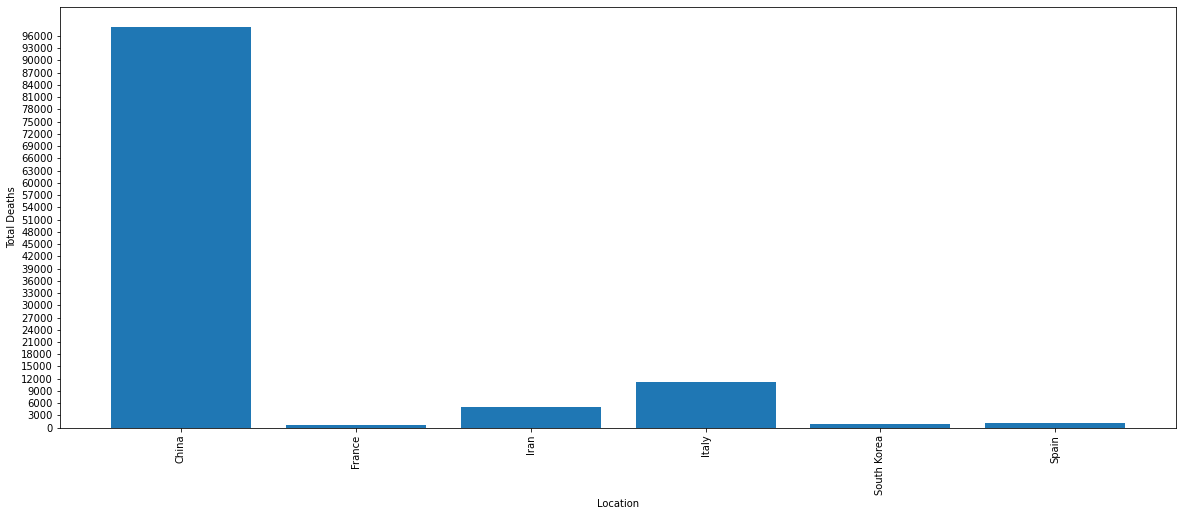

In [15]:
fig,ax = plt.subplots(figsize=(20,8))
ax.bar(country_grouped_df['location'],country_grouped_df['total_deaths'])
ax.set_xlabel('Location')
ax.set_ylabel('Total Deaths')
plt.xticks(rotation='vertical')
plt.yticks(np.arange(0, country_grouped_df['total_deaths'].max(), step=3000))
plt.subplots_adjust(bottom=0.15)
plt.show()

In [16]:
sorted(country_grouped_df['total_deaths'], reverse=True)

[98139, 11277, 5171, 1073, 952, 693]

### Convert date column to DateTime

In [17]:
who_df['date'] = pd.to_datetime(who_df['date'], infer_datetime_format=True)  

In [18]:
who_df.set_index('date')

,location,new_cases,new_deaths,total_cases,total_deaths
date,,,,,
2020-02-25,Afghanistan,0,0,1,0
2020-02-26,Afghanistan,0,0,1,0
2020-02-27,Afghanistan,0,0,1,0
2020-02-28,Afghanistan,0,0,1,0
2020-02-29,Afghanistan,0,0,1,0
...,...,...,...,...,...
2020-03-13,World,7488,338,132758,4956
2020-03-14,World,9761,433,142534,5392
2020-03-15,World,10967,343,153517,5735


### Plot Time series data

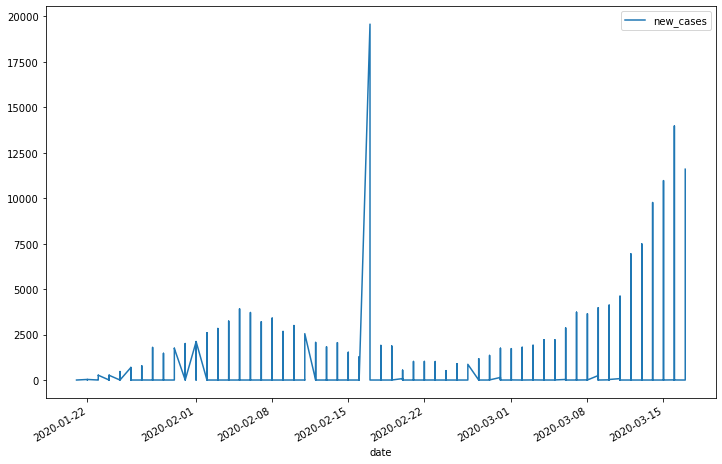

In [19]:
who_df.plot('date','new_cases', figsize=(12,8))
plt.show()